# A. Hummer "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# Business Case

# Problem Statement: The objective of this analysis is to predict which season ticket holders from a random sample will renew their season tickets or not using certain variables.

# To predict these outcomes, a variety of models will need to be constructed and evaluated against each other. Which ever model has the highest accuracy will be used to make the predictions for the following year. Below you can find a table which will tell you what each variable means and what their corresponding values are. 

# This is an important analysis because in business it is better to be proactive whether than reactive. Sports teams need to anticipate revenue and season ticket allotments to get a better understanding of how much more outreach needs to be done. If we can pinpoint certain variables that deter season ticket holders then organizations can target those fans to further encourage renewing their tickets. 

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import scipy.stats as stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import pairwise_distances

In [59]:
df=pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [61]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [62]:
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df['INCOME'] = pd.to_numeric(df['INCOME'], errors='coerce')
df['CHILD'] = pd.to_numeric(df['CHILD'], errors='coerce')
df['GNDR'] = pd.to_numeric(df['GNDR'], errors='coerce')
df['OWNHOME'] = pd.to_numeric(df['OWNHOME'], errors='coerce')
df['COMP'] = pd.to_numeric(df['COMP'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
CHILD       582 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
SPORT       4273 non-null float64
COMP        1009 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.3+ MB


In [63]:
df = df.fillna({'AGE': 61})
df = df.fillna({'CHILD': 0})
df = df.fillna({'INCOME': 3})
df = df.drop(['COMP', 'SPORT', 'OWNHOME'], axis=1)
df.isnull().sum()

FAKEID        0
Y2defect      0
Y1G5          0
Y1G4          0
Y1G3          0
Y1G2          0
Y1G1          0
Y1price       0
YEARS         0
BACKER        0
AGE           0
INCOME        0
CHILD         0
GNDR        498
PCTMARR       0
HOMEVAL       0
dtype: int64

## Unknown child values filled to '0' to represent no children. Changed other column to integers for future testing. Blank ages changed to median and computers were irrelevant with too many missing values. Income also changed to median.

# Data Understanding & Visualization

In [64]:
df.describe()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,PCTMARR,HOMEVAL
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,8718.000000,9216.000000,9216.000000
mean,0.500000,0.337023,0.510525,0.636719,0.291124,0.480252,19.963108,6.378038,0.489475,61.307943,2.907010,0.063151,0.447236,58.228516,112.111220
std,0.500027,0.472718,0.499916,0.480971,0.454305,0.499637,8.820188,2.873927,0.499916,14.691902,1.638565,0.243248,0.497237,12.902173,92.292223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,51.000000,2.000000,0.000000,0.000000,52.000000,56.000000
50%,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,6.000000,0.000000,61.000000,3.000000,0.000000,0.000000,61.000000,81.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000,1.000000,72.000000,4.000000,0.000000,1.000000,67.000000,132.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,24.000000,1.000000,97.000000,6.000000,1.000000,1.000000,99.000000,600.000000


## Interesting that the mean is .5, meaning half renewed and half did not. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000028CD3278>,
      dtype=object)

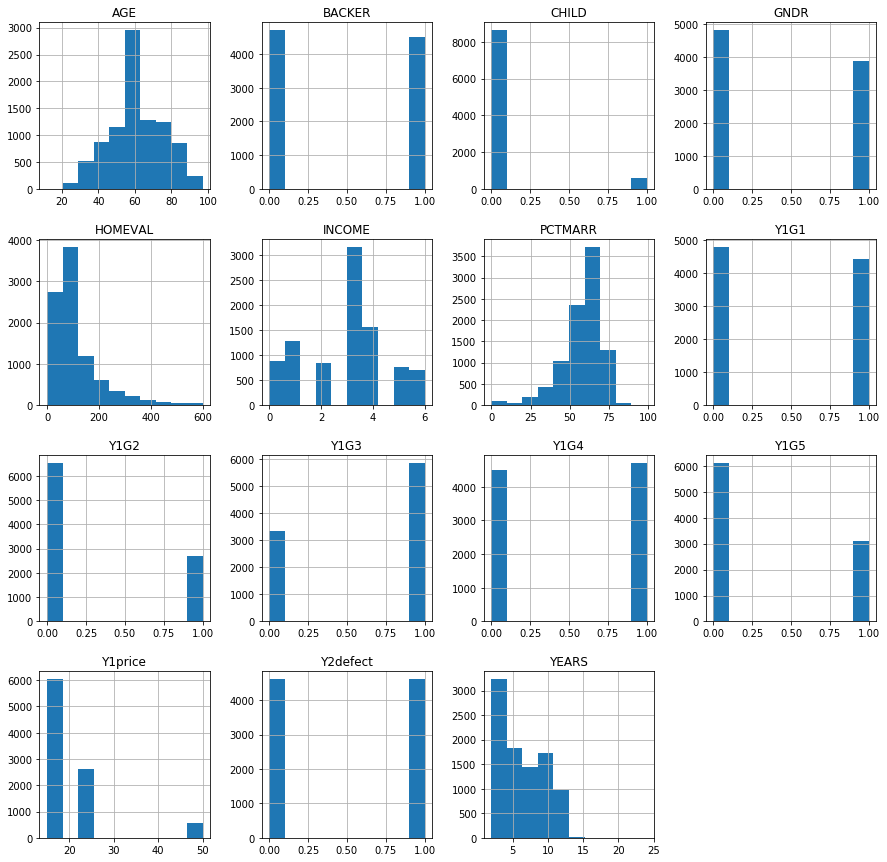

In [65]:
df.hist(figsize=(15,15))

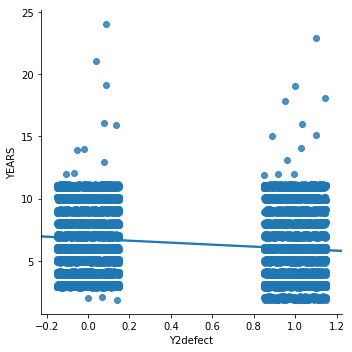

In [66]:
sns.lmplot("Y2defect", "YEARS", df, x_jitter=.15, y_jitter=.15)

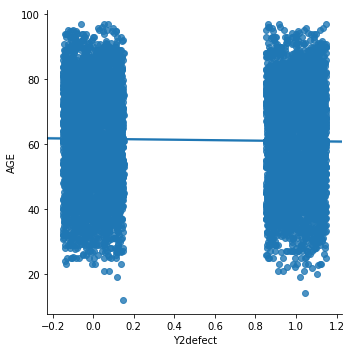

In [67]:
sns.lmplot("Y2defect", "AGE", df, x_jitter=.15, y_jitter=.15)

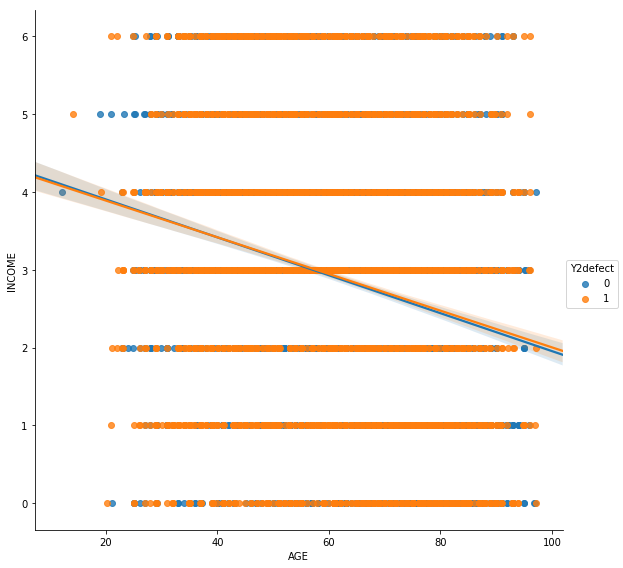

In [68]:
sns.lmplot("AGE", "INCOME", df, hue="Y2defect", x_jitter=.15, size=8)

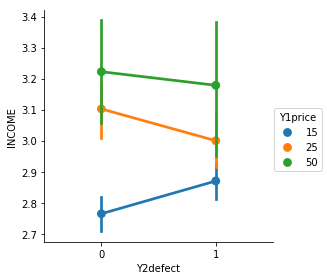

In [69]:
sns.factorplot("Y2defect", "INCOME", "Y1price", data=df)

## There is a lot of new season ticket holders. More than half are married and seems most homes are valued around 100,000 dollars. Season ticket holders are about split being in the backers club. Game 3 was the most attended while game Game 2 was the least attended. 

In [82]:
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,0.0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,61.0,3.0,0.0,0.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,0.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,0.0,1.0,65,194


# Exploratory Data

In [11]:
df.groupby('YEARS').size()

YEARS
2      245
3     1864
4     1122
5      835
6      987
7      864
8      570
9      887
10     846
11     974
12       5
13       2
14       3
15       2
16       3
18       2
19       2
21       1
23       1
24       1
dtype: int64

In [12]:
df.groupby('BACKER').size()

BACKER
0    4705
1    4511
dtype: int64

In [13]:
df.groupby('Y2defect').size()

Y2defect
0    4608
1    4608
dtype: int64

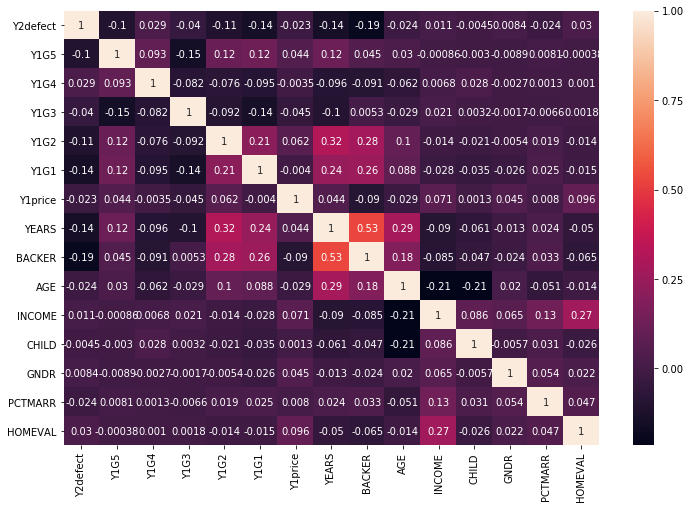

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

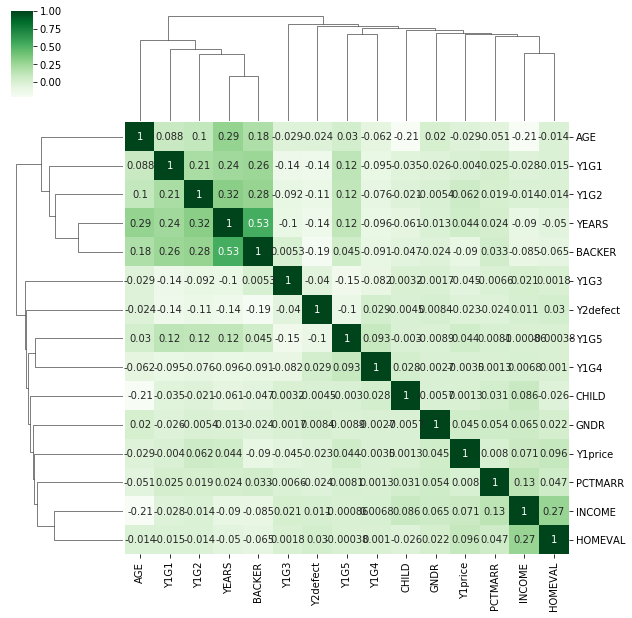

In [70]:
sns.clustermap(data=df.corr(), annot=True, cmap='Greens')

## Does not appear renewing tickets or not correlates strongly with any one category.

In [15]:
df.groupby(['Y2defect', 'BACKER']).count()

FAKEID  Y1G5  Y1G4  Y1G3  Y1G2  Y1G1  Y1price  YEARS   AGE  \
Y2defect BACKER                                                               
0        0         1915  1915  1915  1915  1915  1915     1915   1915  1915   
         1         2693  2693  2693  2693  2693  2693     2693   2693  2693   
1        0         2790  2790  2790  2790  2790  2790     2790   2790  2790   
         1         1818  1818  1818  1818  1818  1818     1818   1818  1818   

                 INCOME  CHILD  GNDR  PCTMARR  HOMEVAL  
Y2defect BACKER                                         
0        0         1915   1915  1831     1915     1915  
         1         2693   2693  2532     2693     2693  
1        0         2790   2790  2652     2790     2790  
         1         1818   1818  1703     1818     1818

## More likely to renew if you are a backer. 

In [16]:
df.groupby(['Y2defect', 'YEARS']).count()

FAKEID  Y1G5  Y1G4  Y1G3  Y1G2  Y1G1  Y1price  BACKER   AGE  \
Y2defect YEARS                                                                
0        2           3     3     3     3     3     3        3       3     3   
         3         671   671   671   671   671   671      671     671   671   
         4         580   580   580   580   580   580      580     580   580   
         5         456   456   456   456   456   456      456     456   456   
         6         585   585   585   585   585   585      585     585   585   
         7         495   495   495   495   495   495      495     495   495   
         8         320   320   320   320   320   320      320     320   320   
         9         492   492   492   492   492   492      492     492   492   
         10        467   467   467   467   467   467      467     467   467   
         11        529   529   529   529   529   529      529     529   529   
         12          2     2     2     2     2     2        2       2     2   
         13          1     1     1     1     1     1        1       1     1   
         14          2     2     2     2     2     2        2       2     2   
         16          2     2     2     2     2     2        2       2     2   
         19          1     1     1     1     1     1        1       1     1   
         21          1     1     1     1     1     1        1       1     1   
         24          1     1     1     1     1     1        1       1     1   
1        2         242   242   242   242   242   242      242     242   242   
         3        1193  1193  1193  1193  1193  1193     1193    1193  1193   
         4         542   542   542   542   542   542      542     542   542   
         5         379   379   379   379   379   379      379     379   379   
         6         402   402   402   402   402   402      402     402   402   
         7         369   369   369   369   369   369      369     369   369   
         8         250   250   250   250   250   250      250     250   250   
         9         395   395   395   395   395   395      395     395   395   
         10        379   379   379   379   379   379      379     379   379   
         11        445   445   445   445   445   445      445     445   445   
         12          3     3     3     3     3     3        3       3     3   
         13          1     1     1     1     1     1        1       1     1   
         14          1     1     1     1     1     1        1       1     1   
         15          2     2     2     2     2     2        2       2     2   
         16          1     1     1     1     1     1        1       1     1   
         18          2     2     2     2     2     2        2       2     2   
         19          1     1     1     1     1     1        1       1     1   
         23          1     1     1     1     1     1        1       1     1   

                INCOME  CHILD  GNDR  PCTMARR  HOMEVAL  
Y2defect YEARS                                         
0        2           3      3     3        3        3  
         3         671    671   644      671      671  
         4         580    580   549      580      580  
         5         456    456   436      456      456  
         6         585    585   551      585      585  
         7         495    495   474      495      495  
         8         320    320   308      320      320  
         9         492    492   465      492      492  
         10        467    467   428      467      467  
         11        529    529   496      529      529  
         12          2      2     1        2        2  
         13          1      1     1        1        1  
         14          2      2     2        2        2  
         16          2      2     2        2        2  
         19          1      1     1        1        1  
         21          1      1     1        1        1  
         24          1      1     1        1        1  
1        2         242    24

## No difference between 12-24 years of having tickets. Being a 3 year ticket holder makes a big difference in not renewing. Between 3-11 years seems evenly distrubuted for renewing. 

## More people who had no magazine subscriptions renewed their tickets but the amount is very insignificant 

# Hypothesis Testing

In [17]:
df['Y2defect'] = df['Y2defect'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 16 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null object
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null float64
INCOME      9216 non-null float64
CHILD       9216 non-null float64
GNDR        8718 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(4), int64(10), object(2)
memory usage: 1.1+ MB


In [18]:
renew = df[df['Y2defect'] == '0']['BACKER']
renewno = df[df['Y2defect'] == '1']['BACKER']
stats.ttest_ind(renew, renewno)

Ttest_indResult(statistic=18.56922946458695, pvalue=1.3520712382657136e-75)

## A p-value of 1.35 shows being a backer is not important enough to determine renewals.

In [19]:
renew1 = df[df['Y2defect'] == '0']['PCTMARR']
renewno1 = df[df['Y2defect'] == '1']['PCTMARR']
stats.ttest_ind(renew1, renewno1)

Ttest_indResult(statistic=2.291809365572433, pvalue=0.021939094186342045)

## With a p-value less than .05, percent married can be an indicator of renewals. 

In [20]:
yes = df[df['Y2defect'] == '0']['YEARS']
no = df[df['Y2defect'] == '1']['YEARS']
stats.ttest_ind(yes, no)

Ttest_indResult(statistic=13.483160293525216, pvalue=4.80841062494896e-41)

## Years of having a season ticket are not important. 

In [21]:
renew2 = df[df['Y2defect'] == '0']['Y1price']
renewno2 = df[df['Y2defect'] == '1']['Y1price']
stats.ttest_ind(renew2, renewno2)

Ttest_indResult(statistic=2.2562160421063284, pvalue=0.02408044624586042)

## Another important indicator of renewals is price. 

In [22]:
renew = df[df['Y2defect'] == '0']['HOMEVAL']
renewno = df[df['Y2defect'] == '1']['HOMEVAL']
stats.ttest_ind(renew, renewno)

Ttest_indResult(statistic=-2.85424923392196, pvalue=0.00432349204448234)

## Home value is important here. 

In [23]:
renew3 = df[df['Y2defect'] == '0']['AGE']
renewno3 = df[df['Y2defect'] == '1']['AGE']
stats.ttest_ind(renew3, renewno3)


Ttest_indResult(statistic=2.2962980325151916, pvalue=0.021681181624315187)

## Age is important.

In [24]:
renew4 = df[df['Y2defect'] == '0']['INCOME']
renewno4 = df[df['Y2defect'] == '1']['INCOME']
stats.ttest_ind(renew4, renewno4)

Ttest_indResult(statistic=-1.0107942245868027, pvalue=0.312141470311754)

## Income not important.

In [25]:
renew5 = df[df['Y2defect'] == '0']['Y1G1']
renewno5 = df[df['Y2defect'] == '1']['Y1G1']
stats.ttest_ind(renew5, renewno5)

Ttest_indResult(statistic=13.730824817047381, pvalue=1.73623609109357e-42)

In [26]:
renew6 = df[df['Y2defect'] == '0']['Y1G2']
renewno6 = df[df['Y2defect'] == '1']['Y1G2']
stats.ttest_ind(renew6, renewno6)

Ttest_indResult(statistic=10.587562130878535, pvalue=4.801814846941348e-26)

In [27]:
renew7 = df[df['Y2defect'] == '0']['Y1G3']
renewno7 = df[df['Y2defect'] == '1']['Y1G3']
stats.ttest_ind(renew7, renewno7)

Ttest_indResult(statistic=3.8579519459186358, pvalue=0.00011512057311832809)

In [28]:
renew8 = df[df['Y2defect'] == '0']['Y1G4']
renewno8 = df[df['Y2defect'] == '1']['Y1G4']
stats.ttest_ind(renew8, renewno8)

Ttest_indResult(statistic=-2.772302206902027, pvalue=0.005577311371221624)

In [29]:
renew9 = df[df['Y2defect'] == '0']['Y1G5']
renewno9 = df[df['Y2defect'] == '1']['Y1G5']
stats.ttest_ind(renew9, renewno9)

Ttest_indResult(statistic=9.834521210905905, pvalue=1.0340000029091189e-22)

## From the games attended, Games 3 and 4 are important to determining renewals.

# Overall, these are the variables I will use to determine the model: (Most likely)
## Percent married
## Ticket price
## Home value
## Age
## Game 3
## Game 4

# Model Building (Decision Tree)

In [ ]:
df['Y2defect'] = df['Y2defect'].astype(int)
df.info()

In [76]:
y = df['Y2defect']
X = df[['Y1G3', 'Y1G4', 'AGE', 'PCTMARR', 'Y1price', 'HOMEVAL']]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [78]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.5027124773960217
[[711 652]
 [723 679]]
             precision    recall  f1-score   support

          0       0.50      0.52      0.51      1363
          1       0.51      0.48      0.50      1402

avg / total       0.50      0.50      0.50      2765

0.502975782421716


In [80]:
scores = cross_val_score(dt, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.48481562 0.47939262 0.5032538  0.50433839 0.50542299 0.52169197
 0.49240781 0.5032538  0.50543478 0.49565217]
0.49956639630293315


In [30]:
df['Y2defect'] = df['Y2defect'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 16 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int32
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null float64
INCOME      9216 non-null float64
CHILD       9216 non-null float64
GNDR        8718 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(4), int32(1), int64(10), object(1)
memory usage: 1.1+ MB


In [31]:
y = df['Y2defect']
X = df[['Y1G5', 'Y1G1', 'Y1G2', 'YEARS', 'BACKER']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.5942133815551537
[[957 406]
 [716 686]]
             precision    recall  f1-score   support

          0       0.57      0.70      0.63      1363
          1       0.63      0.49      0.55      1402

avg / total       0.60      0.59      0.59      2765

0.5957143290739673


In [75]:
scores = cross_val_score(dt, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.59652928 0.60845987 0.61605206 0.59110629 0.60412148 0.60412148
 0.59002169 0.59869848 0.62282609 0.61521739]
0.6047154107328114


## As you can see my original variables were less accurate than the second variables I used. I will explain at the bottom for the switch in x variables.

# Model Building (Regression)

In [35]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm

In [36]:
y = df['Y2defect']
X = df[['Y1G5', 'Y1G1', 'Y1G2', 'YEARS', 'BACKER']]

In [37]:
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [38]:
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [-0.08295757 -0.0823981  -0.04077192 -0.00360434 -0.14401415]
y-intercept  0.6728800299345403


In [39]:
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

,0,1
0,Y1G5,-0.082958
1,Y1G1,-0.082398
2,Y1G2,-0.040772
3,YEARS,-0.003604
4,BACKER,-0.144014


In [40]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[(u'Y1G5', '-0.083'),
 (u'Y1G1', '-0.082'),
 (u'Y1G2', '-0.041'),
 (u'YEARS', '-0.004'),
 (u'BACKER', '-0.144')]

In [41]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.2365146584129062
variance or r-squared:  0.05394136634837543


# Model Building (Nearest Neighbor)

In [71]:
y = df['Y2defect']
X = df[['Y1G5', 'Y1G1', 'Y1G2', 'YEARS', 'BACKER']]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()    #  n_neighbors=5 by default
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [73]:
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.4925858951175407
[[820 543]
 [860 542]]
             precision    recall  f1-score   support

          0       0.49      0.60      0.54      1363
          1       0.50      0.39      0.44      1402

avg / total       0.49      0.49      0.49      2765

0.49410233572623946


In [74]:
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.57266811 0.60520607 0.56941432 0.56182213 0.59327549 0.55965293
 0.5824295  0.58893709 0.58369565 0.58695652]
0.5804057813826276


## Nearest Neighbor not a great model to use with the 49% accuracy.

## Regression not a great model to use here with a very low r-squared value.

### The variables I ended up using were Games 1, 2, and 5, years, and being a backer. This is completely opposite of my hypothesis testing. I only had a 50% accurate model with my predicitions from the hypotheses. I ended up using the variables that had the strongest negative correlations with defecting (which was -.1 or stronger in correlation). This got me a 59.5% accurate model.

# Last Model build (Feature Selection)

In [81]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print X_new

[[ 94.  15. 203.]
 [ 61.  15.  68.]
 [ 67.  15.  38.]
 ...
 [ 61.  15.  95.]
 [ 79.  15.  37.]
 [ 39.  25. 344.]]


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
#model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.5052441229656419
--------------------------------------------------------
[[754 609]
 [759 643]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.50      0.55      0.52      1363
          1       0.51      0.46      0.48      1402

avg / total       0.51      0.51      0.50      2765

--------------------------------------------------------
0.5059110085895528


In [84]:
model = LogisticRegression()
rfe = RFE(model, 4)  #asking four best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True False]
[1 1 2 1 1 3]


In [85]:
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,Y1G3,1
1,Y1G4,1
2,AGE,2
3,PCTMARR,1
4,Y1price,1
5,HOMEVAL,3


## Again, SelectKbest and Recursive Selection still give me bad variables that lead to less accurate models. My best model remains the decision tree using the variables that had the strongest correlations with Y2defect. 

# Model Evaluation

In [42]:
df2 = pd.read_excel("validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [43]:
df2 = df2.rename(columns={"Y2G2": "Y1G2", "Y2G1": "Y1G1", "Y2G5": "Y1G5"})
df2.head()

,FAKEID,Y3defect,Y1G5,Y2G4,Y2G3,Y1G2,Y1G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [44]:
validation = df2[['Y1G5', 'Y1G1', 'Y1G2', 'YEARS', 'BACKER']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 5 columns):
Y1G5      9542 non-null int64
Y1G1      9542 non-null int64
Y1G2      9542 non-null int64
YEARS     9542 non-null int64
BACKER    9542 non-null int64
dtypes: int64(5)
memory usage: 372.8 KB


In [45]:
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [46]:
output_scoring = dt.predict(validation)

In [47]:
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

In [48]:
risky_fans = fakeid.join(probs)

In [49]:
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

In [50]:
risky_fans.to_excel("hummerentry.xlsx", index=False)

# Storytelling

## From all the above work shown above, this proves that all techniques for model building should be taken into account. Initially, I believed that hypothesis testing would show which variables contribute to season ticket renewal by taking every variable that had a p-value of .05 or less, meaning they are statistically significant. 
## Instead, the model only gave me a 50% predictability mark for the variables deemed important. To switch up the variables and find more accurate ones, I went through the correlation heat map. the variables that had the strongest negative correlations were games 1, 2, and 5, years, and backer. 
## The new decision tree model showed a 59.5% accuracy to predict the next year of season ticket renewals. Hopefully this model can somewhat accurately predict what fans will do based on the above variables in the decision tree.

## The only flaw in this dataset is that none of these variables really correlate with renewing season tickets or not. This organization may have to pinpoint new variables that lead to cancelling tickets such as location proximity, being an alumni, or measuring the success of the team itself (wins and losses).